# **Document Embedding with LDA**

The goal of this project is to embed documents using LDA and cluster the embeddings. The dataset consists of news articles and their associated categories. To evaluate the embeddings, several cluster metrics and the cosine similarity are measured.

#**Preprocessing Steps**

This section outlines the steps that occur prior to the generation of embeddings. These steps are necessary to ensure the successful generation of the embeddings.

## **Import Statements**

In [ ]:
#Initializes a WordNetLemmatizer for reducing words to their base forms
from nltk.stem import WordNetLemmatizer
#Initializes a PorterStemmer which reduces words to their root forms
from nltk.stem import PorterStemmer
#Imports the Natural Language Toolkit (NLTK) for text processing
import nltk
#Imports a list of stopwords for text processing
from nltk.corpus import stopwords
#Imports the pandas library for data manipulation and analysis
import pandas as pd
#Library for numerical computations
import numpy as np
#Imports the regular expression module for string pattern matching.
import re
#Imports a module for vreating dictionaries with default values
from collections import defaultdict
#Imports the time function for time related operations
from time import time
#Imports the metrics module from scikit-learn library for evaluating machine learning models
from sklearn import metrics
#Imports TSNE class for dimensionality reduction
from sklearn.manifold import TSNE
#Imports the pyplot module for creating visualizations
import matplotlib.pyplot as plt
#Imports the seaborn library for statistical data visualization
import seaborn as sns
#Imports KMeans class for K-means clustering
from sklearn.cluster import KMeans
#Imports the cosine_similarity for computing cosine similarity between pairs of samples
from sklearn.metrics.pairwise import cosine_similarity
#Imports Counter class for counting hashable objects
from collections import Counter
#Imports silhouette_samples and silhouette_score for measuring the quality of clustering
from sklearn.metrics import silhouette_samples, silhouette_score
#Imports the cm module for handling colormaps
import matplotlib.cm as cm
#Imports the drive module for accessing Google Drive files in Google Colab environment.
from google.colab import drive
#Import the LabelEncoder class to convert categorical variables into numeric values
from sklearn.preprocessing import LabelEncoder
#Import the LatentDirichletAllocation class for topic modeling in text data
from sklearn.decomposition import LatentDirichletAllocation
#Import the CountVectorizer class for converting text data into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
#Import the PCA class for principal component analysis, a technique for dimensionality reduction
from sklearn.decomposition import PCA

## **Download Statements**

In [ ]:
#Downloads the WordNet dataset for the NLTK library for using certain features like lemmatization
nltk.download('wordnet')
#Downloads the stopwords dataset for the NLTK library, which contains common words
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## **Data Preprocessing**

### Dataset One

The dataset consists of 252 different news articles and eight categories. The dataset is stored in the path variable.

In [ ]:
#Mounts the Google Drive at ("/content/drive") in the Google Colab enviornment
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Implementation/Dataset/NewsTwo.csv"

Mounted at /content/drive


In [ ]:
#Read a CSV file into a pandas DataFrame object using the latin1 encoding
news_df = pd.read_csv(path,encoding='latin1')

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Save the original 'News' column for comparison later
news_df['Original_News'] = news_df['News']
news_df['Preprocessed_News'] = news_df['News']

#Convert to lowercase
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].str.lower()

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) #You can choose whether to apply lemmatization
    text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_df['Preprocessed_News'] = news_df['Preprocessed_News'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_df.isnull().values.any():
    news_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data = news_df['Preprocessed_News']
labels = news_df['Category']
print(f"{len(text_data)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

#Display the total number of documents an categories
print(f"{len(news_df)} documents - {true_k} categories")

252 documents 
252 documents - 8 categories


Compare the news article before and after preprocessing

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df = news_df[['Original_News', 'Preprocessed_News']]
comparison_df.head(10)

,Original_News,Preprocessed_News
0,The IMF now expects China's economy to grow by...,imf expect china economi grow year higher prev...
1,Manufacturing activity in the Eurozone has dec...,manufactur activ eurozon declin retail sale fa...
2,Continued disruptions in the global supply cha...,continu disrupt global suppli chain includ rec...
3,Concerns about food security remain high due t...,concern food secur remain high due war ukrain ...
4,"While some central banks, like the US Federal ...",central bank like u feder reserv continu rais ...
5,Bangladeshi workers abroad continue to send st...,bangladeshi worker abroad continu send strong ...
6,The Centre for Economics and Business Research...,centr econom busi research cebr predict bangla...
7,Bangladesh has maintained macroeconomic stabil...,bangladesh maintain macroeconom stabil despit ...
8,Government investments in infrastructure proje...,govern invest infrastructur project like road ...
9,"he US unemployment rate has dropped to 3.5%, i...",u unemploy rate drop lowest level decad reflec...


### Dataset Two

The dataset consists of 50000 different news articles and ten categories.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV-Datei laden
df_two = pd.read_csv("/content/drive/MyDrive/Implementation/Dataset/NewsCategorizer.csv")

news_two_df = df_two.drop(['headline','links','keywords'], axis = 1)

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Convert to lowercase
news_two_df['short_description'] = news_two_df['short_description'].str.lower()

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable.In this case, it is better to use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) #You can choose whether to apply lemmatization
    text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_two_df['short_description'] = news_two_df['short_description'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_two_df.isnull().values.any():
    news_two_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data_two = news_two_df['short_description']
labels_two = news_two_df['category']
print(f"{len(text_data_two)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels_two, category_sizes_two = np.unique(labels_two, return_counts=True)
true_k_two = unique_labels_two.shape[0]

#Display the total number of documents an categories
print(f"{len(news_two_df)} documents - {true_k_two} categories")

50000 documents 
50000 documents - 10 categories


Compare the news article before and after preprocessing

In [ ]:
#Save the original 'News' column for comparison later
news_two_df['Original_News'] = df_two['short_description']
news_two_df['Preprocessed_News'] = news_two_df['short_description']
news_two_df['News'] = news_two_df['short_description']

In [ ]:
news_two_df['Category'] = news_two_df['category']

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df_two = news_two_df[['Original_News', 'Preprocessed_News']]
comparison_df_two.head(10)

,Original_News,Preprocessed_News
0,Resting is part of training. I've confirmed wh...,rest part train ive confirm sort alreadi knew ...
1,Think of talking to yourself as a tool to coac...,think talk tool coach challeng narrat experi c...
2,The clock is ticking for the United States to ...,clock tick unit state find cure team work stud...
3,"If you want to be busy, keep trying to be perf...",want busi keep tri perfect want happi focu mak...
4,"First, the bad news: Soda bread, corned beef a...",first bad news soda bread corn beef beer highl...
5,"By Carey Moss for YouBeauty.com Love rom-coms,...",carey moss youbeautycom love romcom love song ...
6,The nation in general scored a 66.2 in 2011 on...,nation gener score scale littl bit score
7,It's also worth remembering that if the water ...,also worth rememb water seawe come contamin sa...
8,"If you look at our culture's eating behavior, ...",look cultur eat behavior certainli look like a...
9,"François-Marie Arouet, 18th century French aut...",franoismari arouet th centuri french author ic...


### Dataset Three

The dataset consists of around 100000 different news articles and eight categories.

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# CSV-Datei laden
df_three = pd.read_csv("/content/drive/MyDrive/Implementation/Dataset/NewNews.csv",delimiter=";")

news_three_df = df_three.drop(['link','domain','published_date','lang'], axis = 1)

Preprocessing consists of several steps. First, the data is converted into lowercase and stored in a new DataFrame object.Then the functions for lemmatization, stemming, removal of stop words and removal of special characters are implemented

In [ ]:
#Convert to lowercase
news_three_df['title'] = news_three_df['title'].str.lower()

#news_three_df = news_three_df.groupby('topic').apply(lambda x: x.sample(min(len(x), 1000))).reset_index(drop=True)

#Setting the language setting for the stop words
stop_words = set(stopwords.words('english'))

# Initialize the lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

def stem_text(text):
    tokens = text.split()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(stemmed_tokens)

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

def remove_special_characters(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)


All preprocessing steps are combined in one function. In some cases it is better to use lemmatization and stemming. In some other cases it is not suitable. In this case, it is better to use these features

In [ ]:
#Text pre-processing function
def preprocess_text(text):
    text = remove_special_characters(text)
    text = remove_stopwords(text)
    text = lemmatize_text(text) #You can choose whether to apply lemmatization
    text = stem_text(text)  #You can choose whether to apply stemming
    return text

Now the preprocessing steps are applied to the dataset

In [ ]:
#Apply preprocessing to the documents
news_three_df['title'] = news_three_df['title'].apply(preprocess_text)

#Check for missing values ​​and handle them
if news_three_df.isnull().values.any():
    news_three_df.dropna(inplace=True)

#Extract the text data and associated categories from the filtered DataFrame
text_data_three = news_three_df['title']
labels_three = news_three_df['topic']
print(f"{len(text_data_three)} documents ")

#Calculate unique labels and their counts and store the number of categories in "true_k"
unique_labels_three, category_sizes_three = np.unique(labels_three, return_counts=True)
true_k_three = unique_labels_three.shape[0]

#Display the total number of documents an categories
print(f"{len(news_three_df)} documents - {true_k_three} categories")

108774 documents 
108774 documents - 8 categories


Compare the news article before and after preprocessing

In [ ]:
#Save the original 'News' column for comparison later
news_three_df['Original_News'] = df_three['title']
news_three_df['Preprocessed_News'] = news_three_df['title']
news_three_df['News'] = news_three_df['title']

In [ ]:
news_three_df['Category'] = news_three_df['topic']

In [ ]:
#Create a new DataFrame to compare original and preprocessed news articles
comparison_df_three = news_three_df[['Original_News', 'Preprocessed_News']]
comparison_df_three.head(10)

,Original_News,Preprocessed_News
0,A closer look at water-splitting's solar fuel ...,closer look watersplit solar fuel potenti
1,An irresistible scent makes locusts swarm stud...,irresist scent make locust swarm studi find
2,Artificial intelligence warning: AI will know ...,artifici intellig warn ai know u better know
3,Glaciers Could Have Sculpted Mars Valleys: Study,glacier could sculpt mar valley studi
4,Perseid meteor shower 2020: What time and how ...,perseid meteor shower time see huge bright fir...
5,NASA Releases In-Depth Map of Beirut Explosion...,nasa releas indepth map beirut explos damag
6,"SpaceX, NASA Demo-2 Rocket Launch Set for Satu...",spacex nasa demo rocket launch set saturday watch
7,Orbital space tourism set for rebirth in 2021,orbit space tourism set rebirth
8,Greenland's melting ice sheet has 'passed the ...,greenland melt ice sheet pass point return
9,NASA invites engineering students to help harv...,nasa invit engin student help harvest water ma...


#**LDA On First Dataset**

##**LDA**

A document-term matrix from the given text is created using the CountVectorizer from sklearn, excluding English stop words. The matrix X will be used as input for Latent Dirichlet Allocation (LDA) for topic modeling.

In [ ]:
#Create document word matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

Here, an LDA model is initialized with 8 topics, configured for a maximum of 5 iterations, using the batch learning method, with a learning offset of 10.0 and a random seed of 0. The model is then trained on the document-term matrix X.

In [ ]:
#Train LDA model
lda = LatentDirichletAllocation(
    n_components=8,
    max_iter=5,
    learning_method="batch",
    learning_offset=10.0,
    random_state=0,
)
lda.fit(X)

LatentDirichletAllocation(max_iter=5, n_components=8, random_state=0)

Here, the LDA model is used to transform the document-term matrix X into a matrix of topic distributions for each document. The resulting document_topics matrix indicates the proportion of each topic within each document.

In [ ]:
document_topics = lda.transform(X)

In [ ]:
document_topics[0]

array([0.00658135, 0.0065797 , 0.00658372, 0.00659399, 0.00658007,
       0.00658183, 0.00658406, 0.95391528])

In [ ]:
document_topics = np.array(document_topics)

In [ ]:
#Output of topic distributions
print("Topic distributions for each document:")
print(document_topics[:5])

Topic distributions for each document:
[[0.00658135 0.0065797  0.00658372 0.00659399 0.00658007 0.00658183
  0.00658406 0.95391528]
 [0.0089351  0.93745308 0.00894314 0.0089392  0.00893051 0.00893403
  0.00892912 0.00893581]
 [0.00735512 0.00735944 0.00736722 0.9484918  0.0073576  0.00735959
  0.00735478 0.00735446]
 [0.00833609 0.00833615 0.73170284 0.00835073 0.21824277 0.00834783
  0.00834172 0.00834187]
 [0.00694828 0.00694842 0.00695625 0.00695028 0.00694488 0.0069595
  0.95134182 0.00695057]]


The code prints the top words associated with each topic identified by the LDA model. For each topic, it retrieves and displays the top 5 words based on their importance (highest to lowest) from the lda.components_ matrix, using the feature names from the CountVectorizer.

In [ ]:
#Display of topic-word distributions.
print("\nTop words in each topic:")
terms = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-6:-1]]))


Top words in each topic:
Topic 1:
develop new ai cancer diseas
Topic 2:
ai data expo big south
Topic 3:
nuclear ukrain war iran global
Topic 4:
china food rise power price
Topic 5:
fan gene therapi salmon new
Topic 6:
new develop climat studi research
Topic 7:
new develop drug imag research
Topic 8:
studi diseas peopl heart level


## **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans = KMeans(
    n_clusters=true_k,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(document_topics)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, t-SNE (t-Distributed Stochastic Neighbor Embedding) is used

In [ ]:
#Reduce dimensionality of embeddings using t-SNE
tsne = TSNE(n_components=2, random_state=42,init='random')
embeddings_2d = tsne.fit_transform(document_topics)

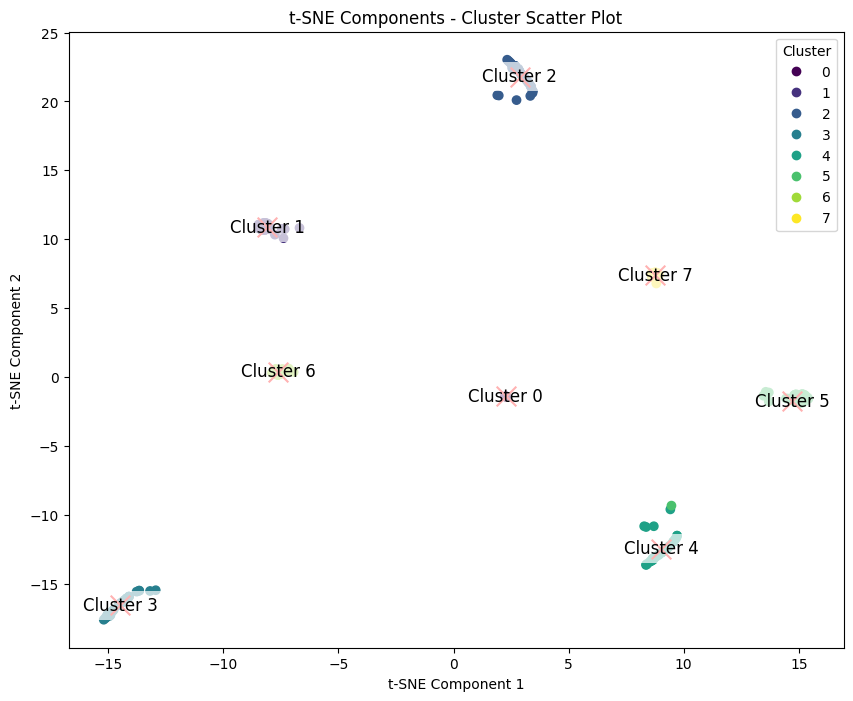

True number of documents in each category according to the class labels: [27 35 39 36 27 32 24 32]
Number of elements assigned to each cluster: [19 30 40 38 40 35 26 24]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_lda, cluster_sizes_lda = np.unique(kmeans.labels_, return_counts=True)

#Visualize the clusters using the t-SNE reduced data
plt.figure(figsize=(10, 8))
cluster_labels = kmeans.labels_

scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k):
    plt.text(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d[cluster_labels == label, 0].mean(), embeddings_2d[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_lda}")


## **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 0.47 ± 0.20 s 
Homogeneity: 0.077 ± 0.000
Completeness: 0.077 ± 0.000
V-measure: 0.077 ± 0.000
Adjusted Rand-Index: 0.012 ± 0.000
Silhouette Coefficient: 0.910 ± 0.000


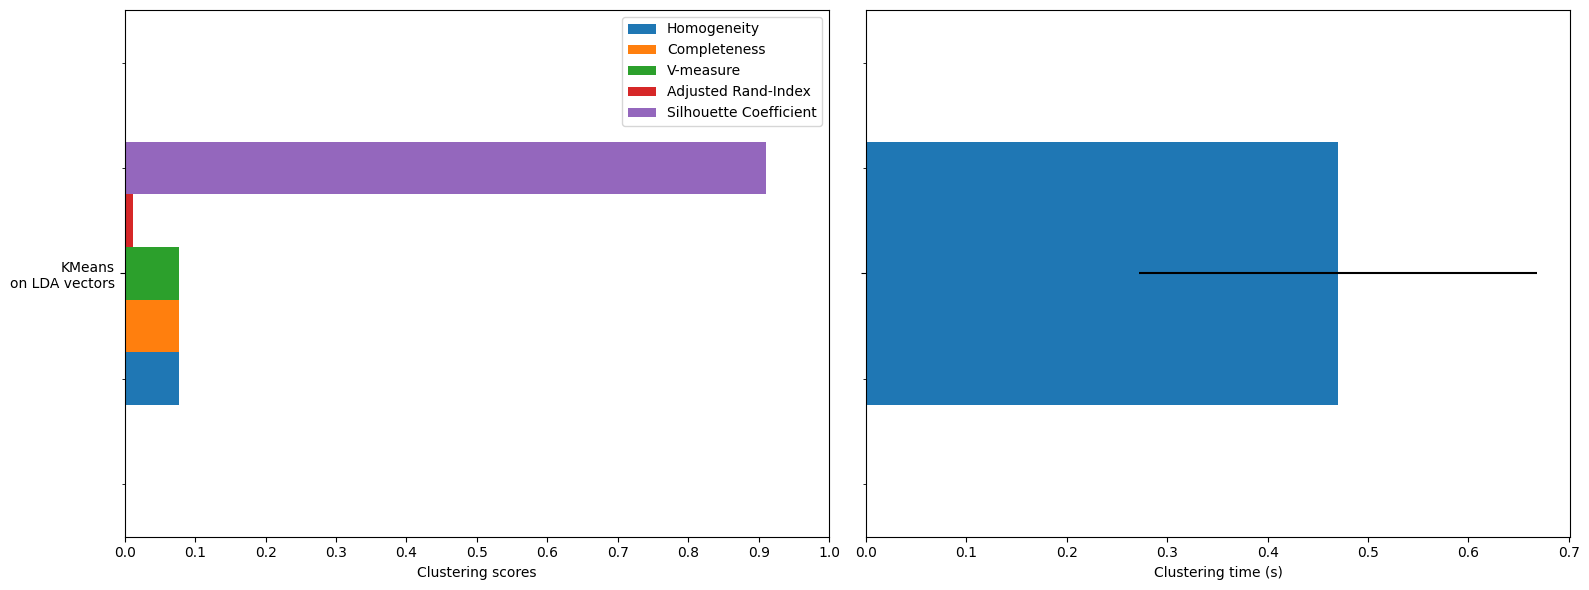

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans, document_topics, name="KMeans\non LDA vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

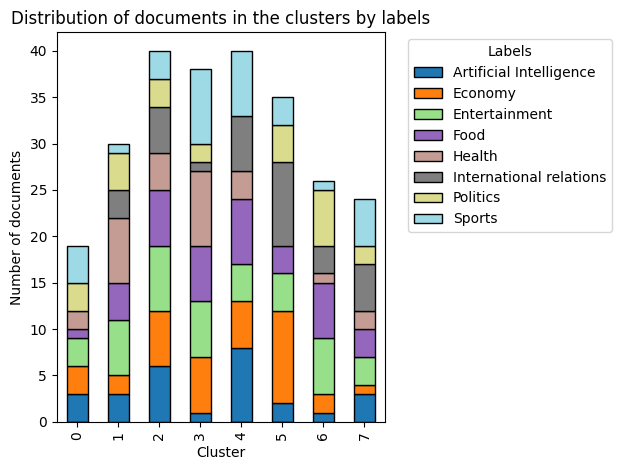

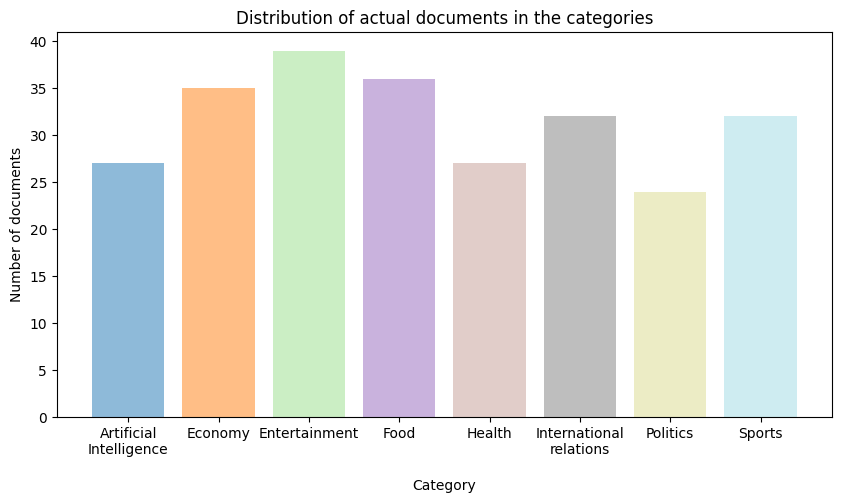


Distribution of documents in the clusters according to labels:
true_label  Artificial Intelligence   Economy  Entertainment  Food  Health  \
cluster                                                                      
0                                  3        3              3     1       2   
1                                  3        2              6     4       7   
2                                  6        6              7     6       4   
3                                  1        6              6     6       8   
4                                  8        5              4     7       3   
5                                  2       10              4     3       0   
6                                  1        2              6     6       1   
7                                  3        1              3     3       2   

true_label  International relations  Politics  Sports  
cluster                                                
0                                 0        

In [ ]:
x_labels = news_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes)), category_sizes, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_lda):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_df[news_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the LDA vectors of the documents in the current category.
        category_lda = document_topics[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_lda)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for Economy: 0.16869846767255428
Average Cosine Similarity for Health: 0.21020092586693973
Average Cosine Similarity for Sports: 0.15539058223216687
Average Cosine Similarity for Entertainment: 0.1319142451272279
Average Cosine Similarity for Politics: 0.15194719768403925
Average Cosine Similarity for International relations: 0.19105370496278362
Average Cosine Similarity for Food: 0.14385062237268542
Average Cosine Similarity for Artificial Intelligence : 0.17672758359855406


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  # Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_df[news_df['Category'] == category1].index
    category1_vector = document_topics[indices1]

    #Extract the documents in the second category
    indices2 = news_df[news_df['Category'] == category2].index
    category2_vector = document_topics[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between Economy and Health: 0.1448058744373637
Average Cosine Similarity between Sports and Entertainment: 0.1335421393745638
Average Cosine Similarity between Politics and International relations: 0.1555980861836697
Average Cosine Similarity between Food and Artificial Intelligence : 0.1525023173078698


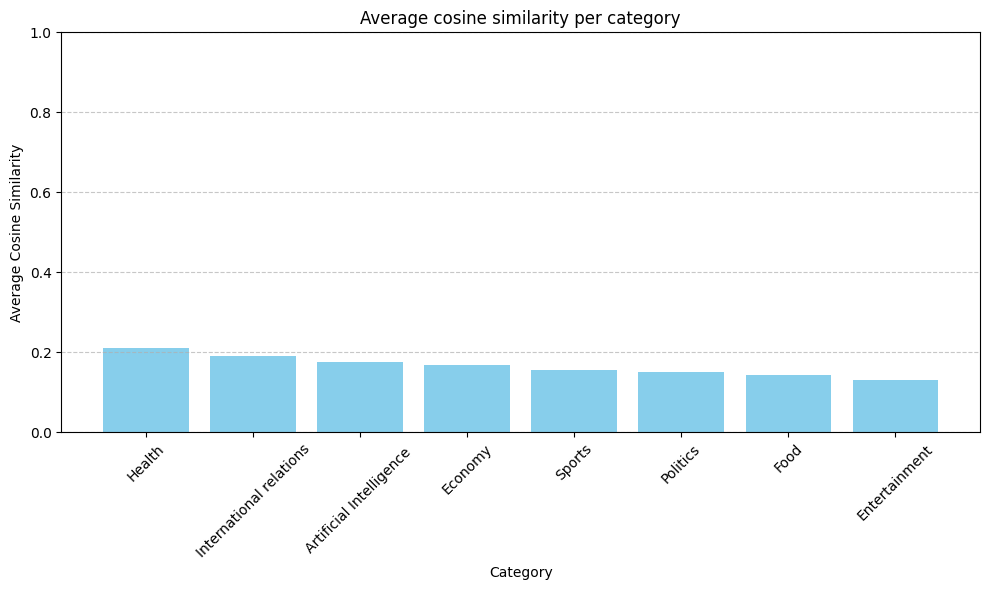

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  #Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

Now we want to show the top ten documents for each cluster based on the cosine similarity.

In [ ]:
#Number of top documents you want to display
num_top_documents = 10


#Empty list to store the most important documents for each cluster
top_documents_per_cluster = []

#Iterate over each cluster
for cluster_id in range(true_k):

    #Filter the indexes of documents associated with this cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    #Calculate the cosine similarity between the cluster center and all documents
    cluster_center = kmeans.cluster_centers_[cluster_id].reshape(1, -1)
    similarities = cosine_similarity(cluster_center, document_topics)[0]

    #Sort the documents according to their similarity and get the indices
    sorted_document_indices = cluster_indices[np.argsort(similarities[cluster_indices])[::-1]]

    #Select the first num_top_documents documents
    top_document_indices = sorted_document_indices[:num_top_documents]

    #Store the indexes of the top documents for this cluster
    top_documents_per_cluster.append(top_document_indices)

Here we create a heatmap which visually represents the top categories for each cluster

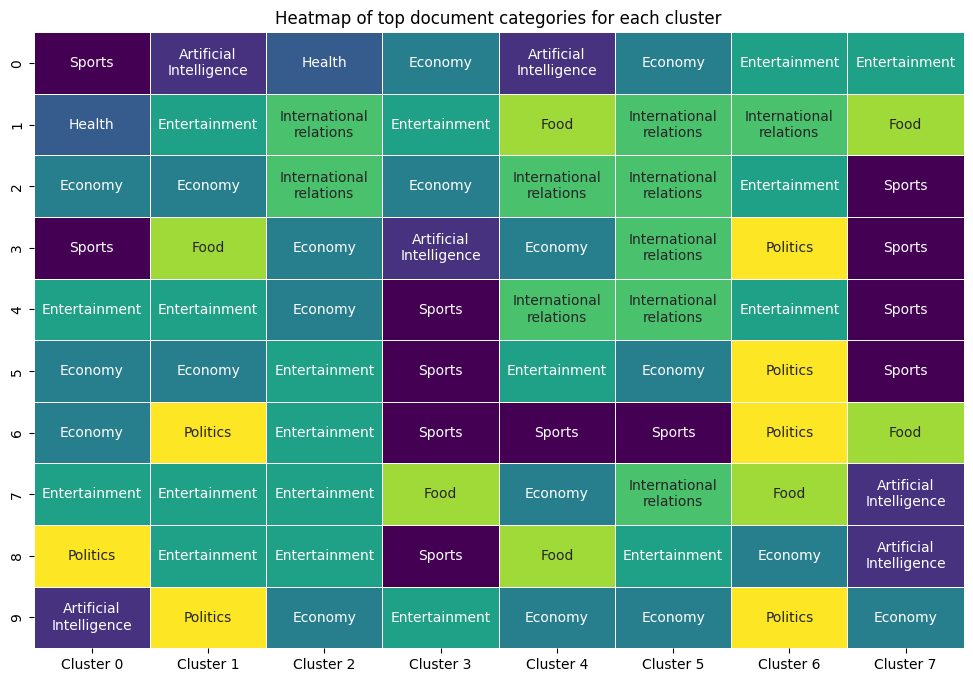

In [ ]:
#Create a heatmap of the top document categories for each cluster
heatmap_data = []
for cluster_id, top_document_indices in enumerate(top_documents_per_cluster):
    top_categories = news_df.iloc[top_document_indices]['Category'].values
    formatted_categories = ['\n'.join(category.split()) for category in top_categories]
    heatmap_data.append(formatted_categories)

#Create DataFrame for the heatmap
heatmap_df = pd.DataFrame(heatmap_data, index=[f'Cluster {i}' for i in range(true_k)])
heatmap_df = heatmap_df.T  # Transpose for better visualization
heatmap_df = heatmap_df.dropna()

#Convert categories to numerical values for heatmap coloring
category_to_num = {category: num for num, category in enumerate(heatmap_df.stack().unique())}
heatmap_numeric = heatmap_df.applymap(lambda x: category_to_num[x])

#Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_numeric,
    annot=heatmap_df,
    fmt='',
    cmap='viridis',
    cbar=False,
    linewidths=.5
)
plt.title("Heatmap of top document categories for each cluster")
plt.show()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

#**LDA On Second Dataset**

##**LDA**

A document-term matrix from the given text is created using the CountVectorizer from sklearn, excluding English stop words. The matrix X will be used as input for Latent Dirichlet Allocation (LDA) for topic modeling.

In [ ]:
#Create document word matrix
vectorizer_two = CountVectorizer(stop_words='english')
X_two = vectorizer_two.fit_transform(text_data_two)

Here, an LDA model is initialized with 10 topics, configured for a maximum of 5 iterations, using the batch learning method, with a learning offset of 50.0 and a random seed of 0. The model is then trained on the document-term matrix X.

In [ ]:
#Train LDA model
lda_two = LatentDirichletAllocation(
    n_components=10,
    max_iter=5,
    learning_method="batch",
    learning_offset=50.0,
    random_state=0,
)
lda_two.fit(X_two)

LatentDirichletAllocation(learning_offset=50.0, max_iter=5, random_state=0)

Here, the LDA model is used to transform the document-term matrix X into a matrix of topic distributions for each document. The resulting document_topics matrix indicates the proportion of each topic within each document.

In [ ]:
embeddings_two = lda_two.transform(X_two)

In [ ]:
embeddings_two[0]

array([0.00344872, 0.00344897, 0.18134777, 0.00344914, 0.00344893,
       0.00344926, 0.00344934, 0.00344939, 0.00344917, 0.7910593 ])

In [ ]:
embeddings_two = np.array(embeddings_two)

In [ ]:
#Output of topic distributions
print("Topic distributions for each document:")
print(embeddings_two[:5])

Topic distributions for each document:
[[0.00344872 0.00344897 0.18134777 0.00344914 0.00344893 0.00344926
  0.00344934 0.00344939 0.00344917 0.7910593 ]
 [0.00769339 0.24659905 0.00769433 0.00769292 0.00769326 0.00769434
  0.00769426 0.00769461 0.69185031 0.00769353]
 [0.00833615 0.00833511 0.00833374 0.00833508 0.00833471 0.00833437
  0.0083339  0.37228619 0.00833507 0.56103567]
 [0.0100009  0.01000235 0.01000345 0.01000234 0.01000289 0.01000192
  0.01000267 0.01000448 0.90997715 0.01000185]
 [0.00714332 0.00714463 0.74447315 0.00714335 0.00714582 0.00714487
  0.00714431 0.19836774 0.00714746 0.00714534]]


The code prints the top words associated with each topic identified by the LDA model. For each topic, it retrieves and displays the top 5 words based on their importance (highest to lowest) from the lda.components_ matrix, using the feature names from the CountVectorizer.

In [ ]:
#Display of topic word distributions
print("\nTop words in each topic:")
terms = vectorizer_two.get_feature_names_out()
for topic_idx, topic in enumerate(lda_two.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-6:-1]]))


Top words in each topic:
Topic 1:
countri new state said govern
Topic 2:
time like work day peopl
Topic 3:
like look way make time
Topic 4:
year day new mani peopl
Topic 5:
check style want sure twitter
Topic 6:
new world make compani health
Topic 7:
time famili child travel life
Topic 8:
food new eat make life
Topic 9:
need child love make parent
Topic 10:
think look like know time


## **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans_two = KMeans(
    n_clusters=true_k_two,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(embeddings_two)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, SVD (Singular Value Decomposition) is used, cause it need less time and computing power.

In [ ]:
#Reducing the dimensions of the embeddings with PCA.
pca = PCA(n_components=2)
embeddings_2d_two = pca.fit_transform(embeddings_two)

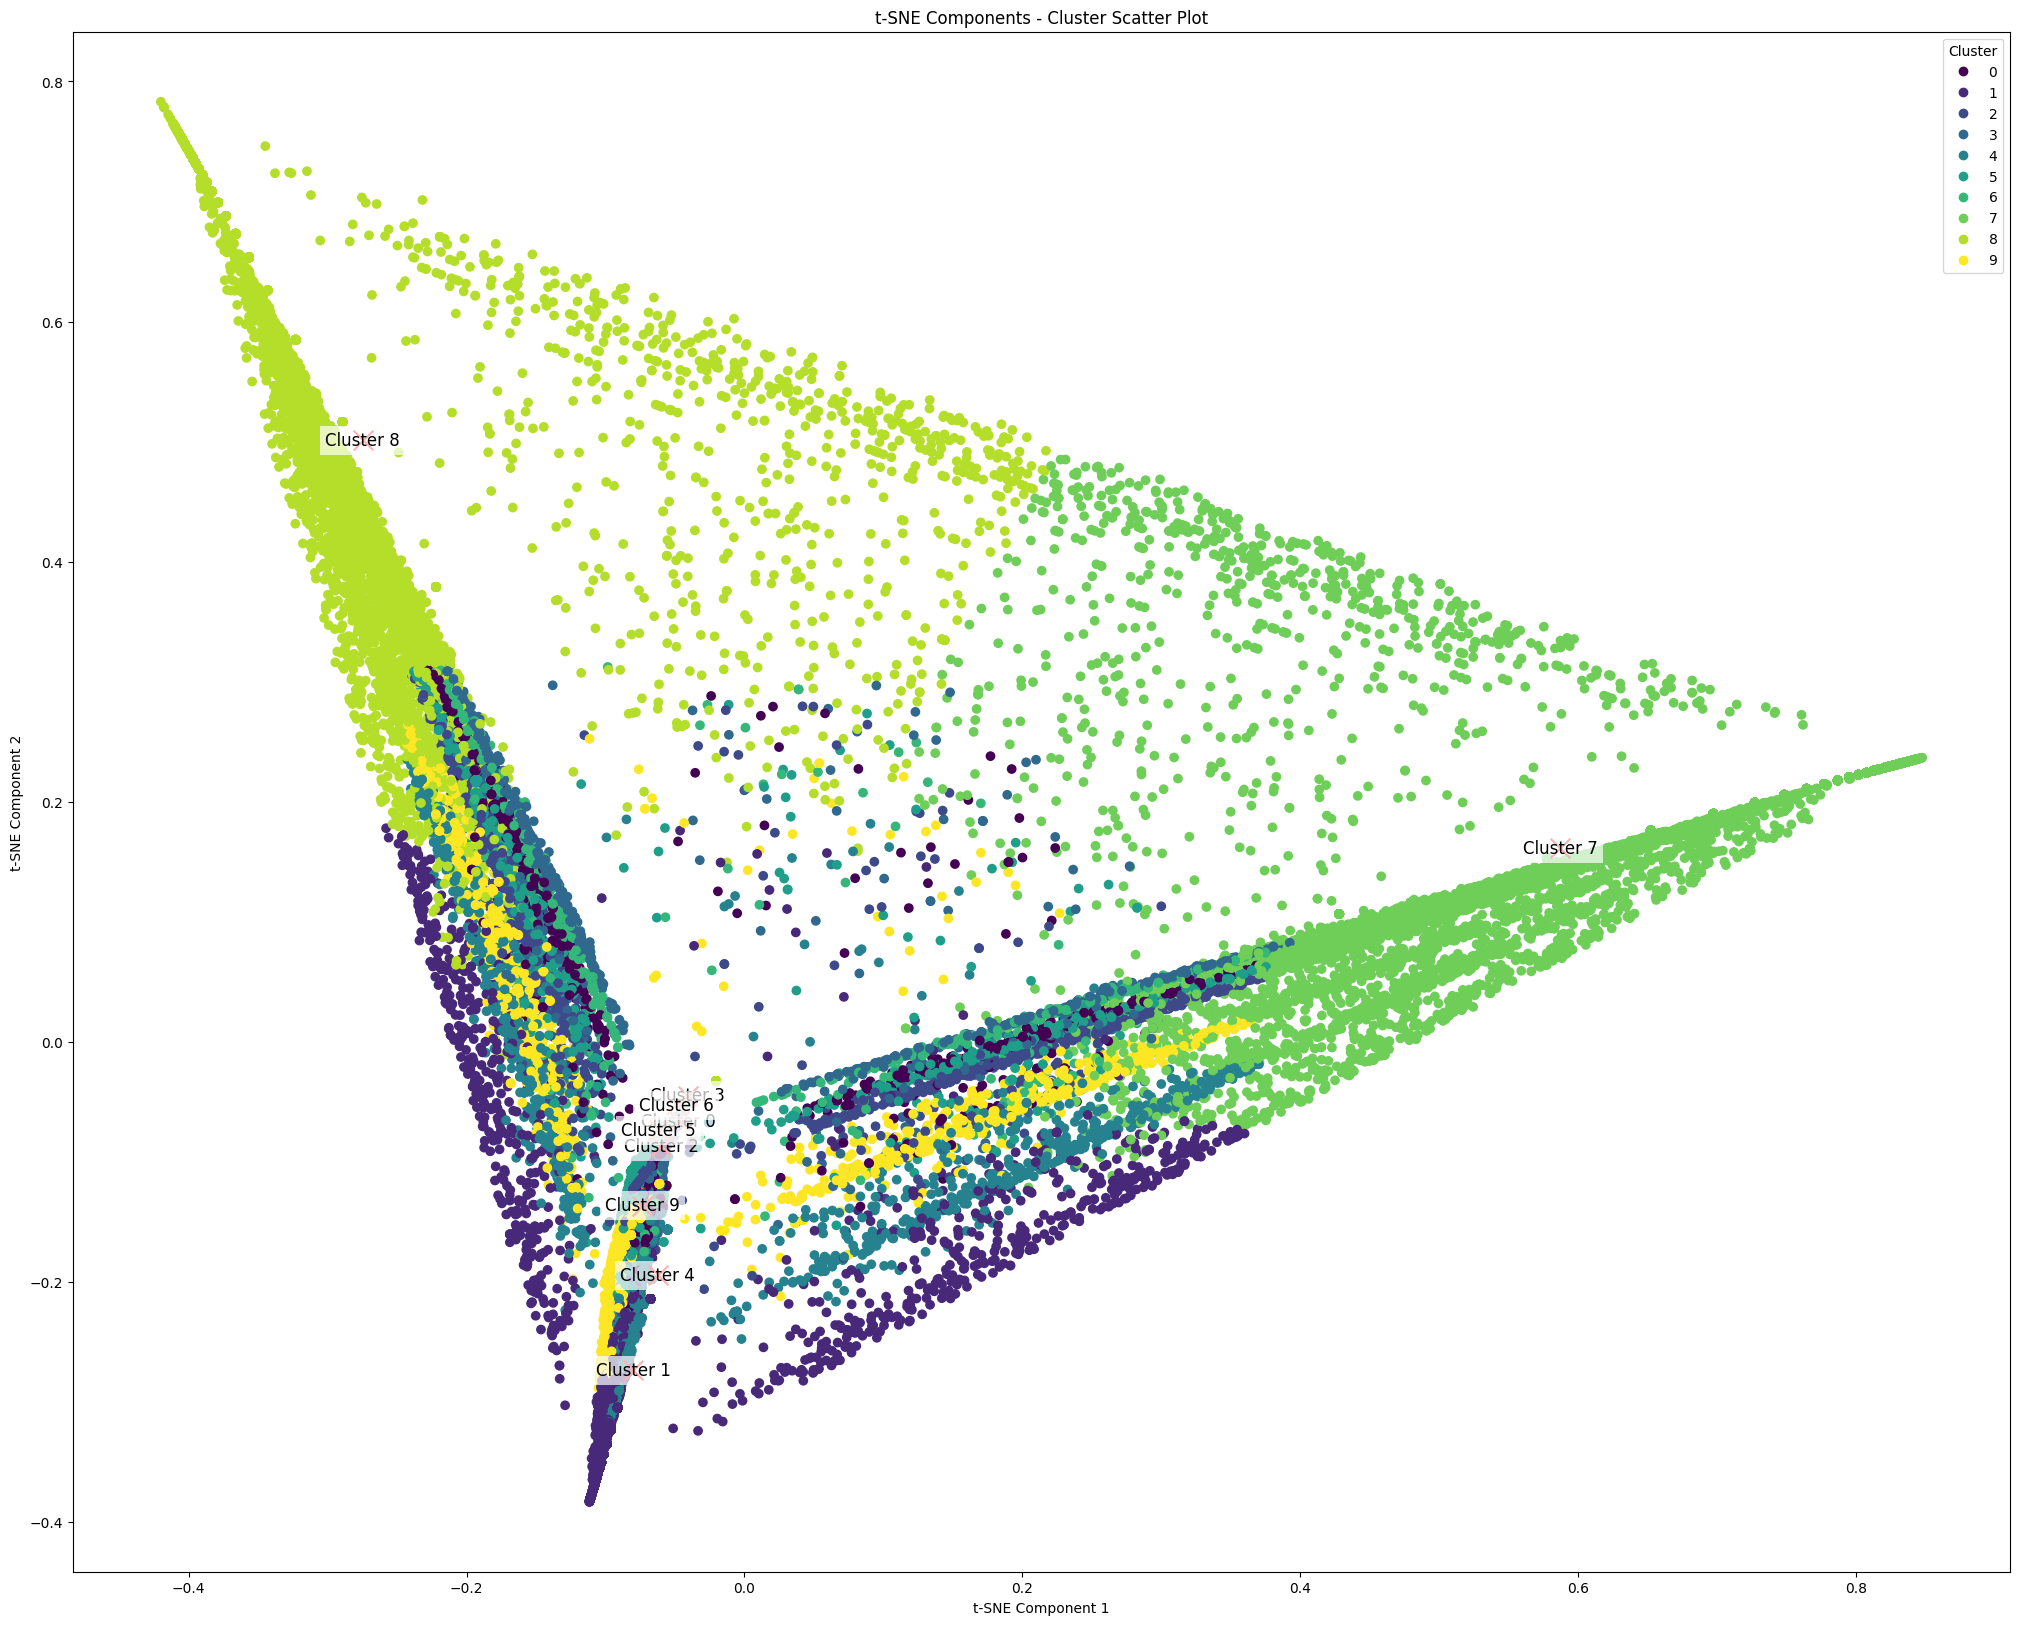

True number of documents in each category according to the class labels: [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]
Number of elements assigned to each cluster: [4163 5498 4704 3648 5128 4498 3472 6967 6836 5086]


In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_lda, cluster_sizes_lda = np.unique(kmeans_two.labels_, return_counts=True)

#Visualize the clusters using the PCA reduced data
plt.figure(figsize=(25, 20))
cluster_labels = kmeans_two.labels_

scatter = plt.scatter(embeddings_2d_two[:, 0], embeddings_2d_two[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k_two):
    plt.text(embeddings_2d_two[cluster_labels == label, 0].mean(), embeddings_2d_two[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d_two[cluster_labels == label, 0].mean(), embeddings_2d_two[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

#Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

#Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes_two}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_lda}")


## **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=1):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_two, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_two, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_two, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_two, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 7.12 ± 0.00 s 
Homogeneity: 0.075 ± 0.000
Completeness: 0.076 ± 0.000
V-measure: 0.076 ± 0.000
Adjusted Rand-Index: 0.053 ± 0.000
Silhouette Coefficient: 0.530 ± 0.000


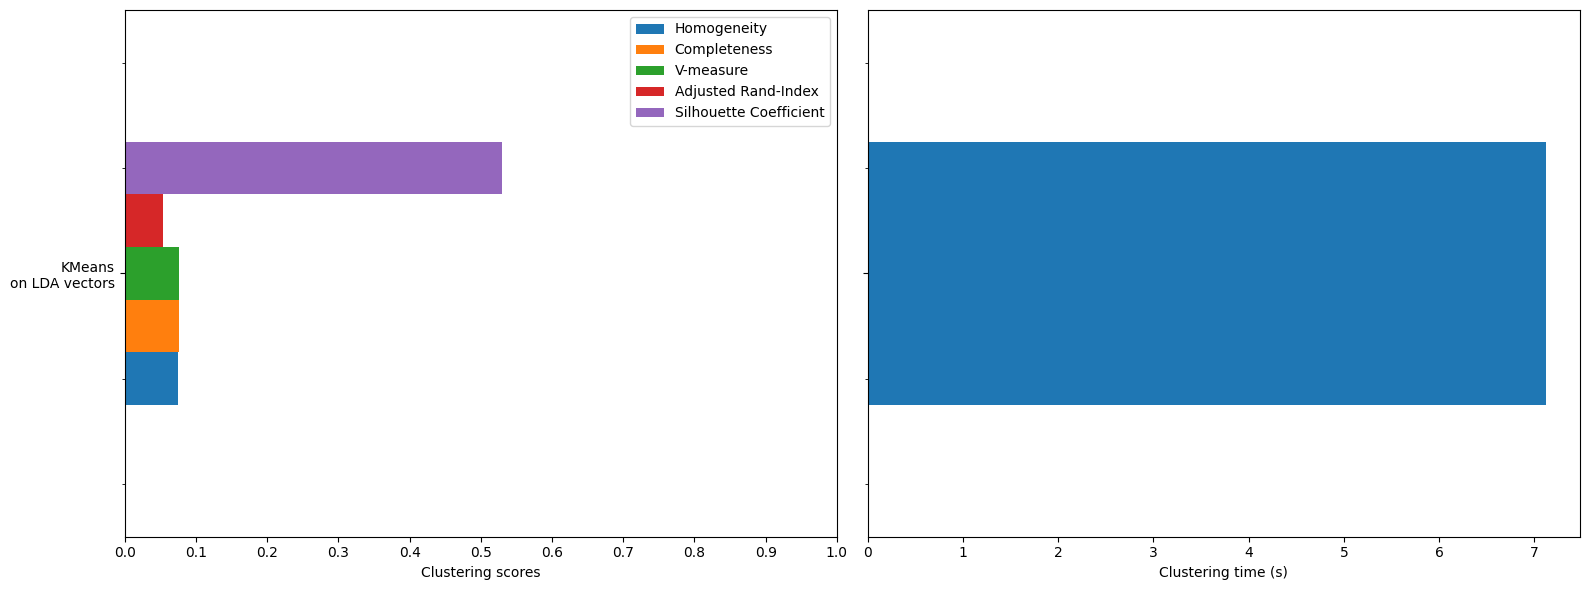

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans_two, embeddings_two, name="KMeans\non LDA vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

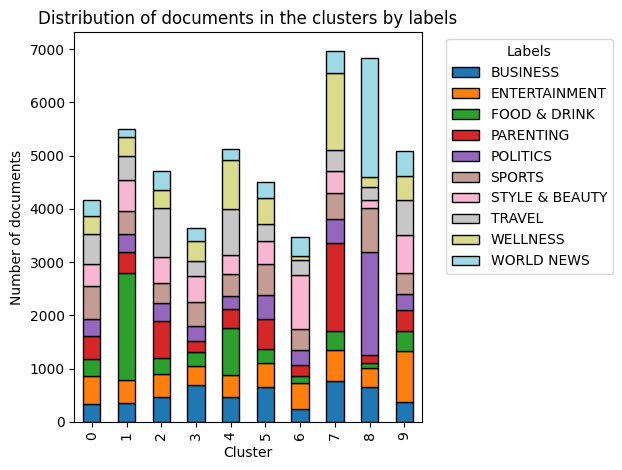

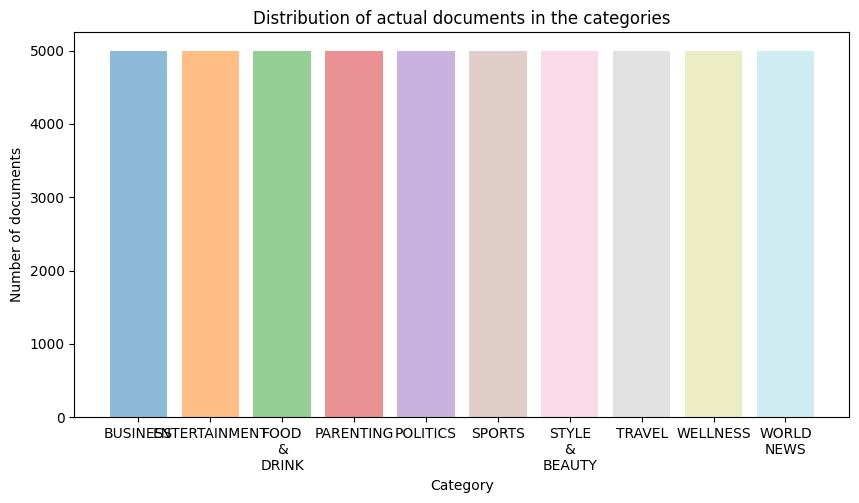


Distribution of documents in the clusters according to labels:
true_label  BUSINESS  ENTERTAINMENT  FOOD & DRINK  PARENTING  POLITICS  \
cluster                                                                  
0                327            539           311        427       334   
1                348            439          2001        398       346   
2                467            435           301        688       334   
3                690            356           273        198       291   
4                470            414           873        362       250   
5                661            443           259        560       453   
6                248            476           145        197       287   
7                758            594           363       1638       449   
8                650            354           107        138      1948   
9                381            950           367        394       308   

true_label  SPORTS  STYLE & BEAUTY  TRAVEL  WEL

In [ ]:
x_labels = news_two_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_two_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes_two = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes_two)), category_sizes_two, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes_two)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_lda):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes_two):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_two_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_two_df[news_two_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the LDA vectors of the documents in the current category.
        category_lda = embeddings_two[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_lda)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for WELLNESS: 0.25038121419318055
Average Cosine Similarity for POLITICS: 0.3048437197417709
Average Cosine Similarity for ENTERTAINMENT: 0.20359248097179433
Average Cosine Similarity for TRAVEL: 0.20562219391052183
Average Cosine Similarity for STYLE & BEAUTY: 0.20762984175714
Average Cosine Similarity for PARENTING: 0.26100437581530395
Average Cosine Similarity for FOOD & DRINK: 0.31896189929678864
Average Cosine Similarity for WORLD NEWS: 0.3428040626012632
Average Cosine Similarity for BUSINESS: 0.1791353745735683
Average Cosine Similarity for SPORTS: 0.17746090759462424


Get the cosine siimilarity between categories

In [ ]:
#Get the unique categories
categories = news_two_df['Category'].unique()

#list for the results
results = []

#Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  #Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    #Extract the vectors of the documents in the first category
    indices1 = news_two_df[news_two_df['Category'] == category1].index
    category1_vector = embeddings_two[indices1]

    #Extract the documents in the second category
    indices2 = news_two_df[news_two_df['Category'] == category2].index
    category2_vector = embeddings_two[indices2]

    #Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    #Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    #Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

#Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

#If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between WELLNESS and POLITICS: 0.16833226958451
Average Cosine Similarity between ENTERTAINMENT and TRAVEL: 0.18959733416227437
Average Cosine Similarity between STYLE & BEAUTY and PARENTING: 0.1737878311543319
Average Cosine Similarity between FOOD & DRINK and WORLD NEWS: 0.13710702253397092
Average Cosine Similarity between BUSINESS and SPORTS: 0.1723518999548562


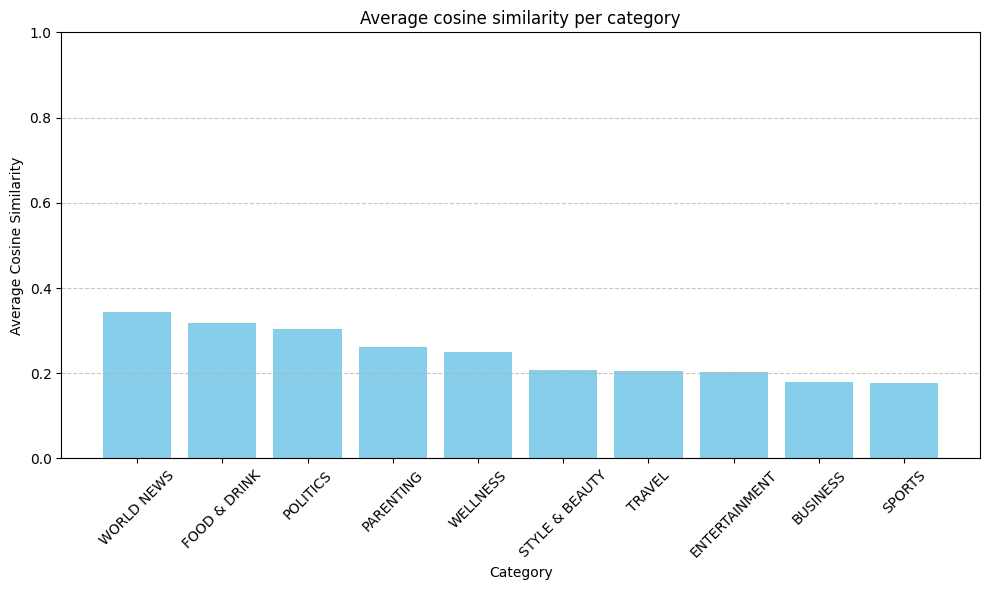

In [ ]:
#Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

#Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#Show chart
plt.show()

Now we want to show the top ten documents for each cluster based on the cosine similarity.

In [ ]:
#Number of top documents you want to display
num_top_documents = 10
#Get the assignment of the documents to the clusters
#cluster_labels = kmeans.labels_

#Empty list to store the most important documents for each cluster
top_documents_per_cluster = []

#Iterate over each cluster
for cluster_id in range(true_k_two):

    #Filter the indexes of documents associated with this cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    #Calculate the cosine similarity between the cluster center and all documents
    cluster_center = kmeans_two.cluster_centers_[cluster_id].reshape(1, -1)
    similarities = cosine_similarity(cluster_center, embeddings_two)[0]

    #Sort the documents according to their similarity and get the indices
    sorted_document_indices = cluster_indices[np.argsort(similarities[cluster_indices])[::-1]]

    #Select the first num_top_documents documents
    top_document_indices = sorted_document_indices[:num_top_documents]

    #Store the indexes of the top documents for this cluster
    top_documents_per_cluster.append(top_document_indices)

 Here we create a heatmap which visually represents the top categories for each cluster based on the cosine similarity. The documents are sorted in descending order according to their similarity to the cluster center.

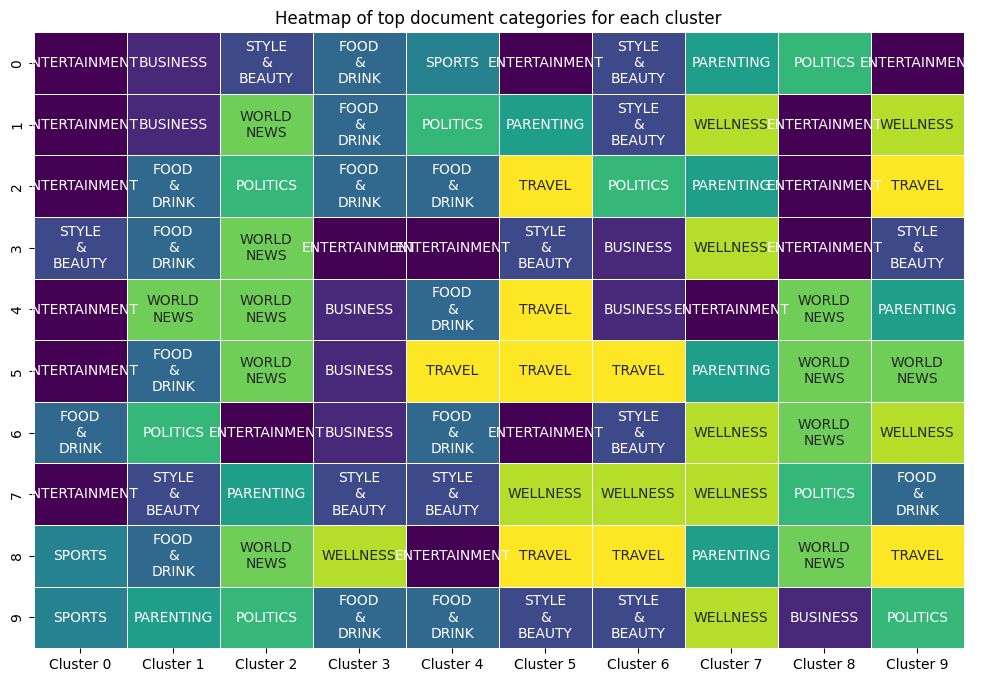

In [ ]:
#Create a heatmap of the top document categories for each cluster
heatmap_data = []
for cluster_id, top_document_indices in enumerate(top_documents_per_cluster):
    top_categories = news_two_df.iloc[top_document_indices]['Category'].values
    formatted_categories = ['\n'.join(category.split()) for category in top_categories]
    heatmap_data.append(formatted_categories)

#Create DataFrame for the heatmap
heatmap_df = pd.DataFrame(heatmap_data, index=[f'Cluster {i}' for i in range(true_k_two)])
heatmap_df = heatmap_df.T  # Transpose for better visualization
heatmap_df = heatmap_df.dropna()

#Convert categories to numerical values for heatmap coloring
category_to_num = {category: num for num, category in enumerate(heatmap_df.stack().unique())}
heatmap_numeric = heatmap_df.applymap(lambda x: category_to_num[x])

#Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_numeric,
    annot=heatmap_df,
    fmt='',
    cmap='viridis',
    cbar=False,
    linewidths=.5
)
plt.title("Heatmap of top document categories for each cluster")
plt.show()


#**LDA On Third Dataset**

##**LDA**

A document-term matrix from the given text is created using the CountVectorizer from sklearn, excluding English stop words. The matrix X will be used as input for Latent Dirichlet Allocation (LDA) for topic modeling.

In [ ]:
#Create document word matrix
vectorizer_three = CountVectorizer(stop_words='english')
X_three = vectorizer_three.fit_transform(text_data_three)

Here, an LDA model is initialized with 8 topics, configured for a maximum of 5 iterations, using the batch learning method, with a learning offset of 50.0 and a random seed of 0. The model is then trained on the document-term matrix X.

In [ ]:
#Train LDA model
lda_three = LatentDirichletAllocation(
    n_components=8,
    max_iter=5,
    learning_method="batch",
    learning_offset=50.0,
    random_state=0,
)
lda_three.fit(X_three)

LatentDirichletAllocation(learning_offset=50.0, max_iter=5, n_components=8,
                          random_state=0)

Here, the LDA model is used to transform the document-term matrix X into a matrix of topic distributions for each document. The resulting document_topics matrix indicates the proportion of each topic within each document.

In [ ]:
embeddings_three = lda_three.transform(X_three)

In [ ]:
embeddings_three[0]

array([0.01786772, 0.01791617, 0.01786604, 0.87476801, 0.01787374,
       0.01792854, 0.01789027, 0.01788951])

In [ ]:
embeddings_three = np.array(embeddings_three)

In [ ]:
#Output of topic distributions
print("Topic distributions for each document:")
print(embeddings_three[:5])

Topic distributions for each document:
[[0.01786772 0.01791617 0.01786604 0.87476801 0.01787374 0.01792854
  0.01789027 0.01788951]
 [0.01787403 0.01786051 0.01786947 0.87492099 0.0178652  0.01788301
  0.01786484 0.01786196]
 [0.17275712 0.25787836 0.01563348 0.49117488 0.01564052 0.01563304
  0.01563838 0.01564422]
 [0.85404453 0.02083546 0.0208473  0.02086326 0.02083857 0.02083636
  0.02089159 0.02084293]
 [0.01251077 0.01250235 0.01250317 0.01250539 0.01250401 0.01250799
  0.01251793 0.91244838]]


The code prints the top words associated with each topic identified by the LDA model. For each topic, it retrieves and displays the top 5 words based on their importance (highest to lowest) from the lda.components_ matrix, using the feature names from the CountVectorizer.

In [ ]:
#Display of topic word distributions
print("\nTop words in each topic:")
terms = vectorizer_three.get_feature_names_out()
for topic_idx, topic in enumerate(lda_three.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([terms[i] for i in topic.argsort()[:-6:-1]]))


Top words in each topic:
Topic 1:
covid coronaviru death test case
Topic 2:
covid market case new global
Topic 3:
covid coronaviru test dy trial
Topic 4:
new season featur reveal releas
Topic 5:
game appl sale price app
Topic 6:
man leagu transfer unit galaxi
Topic 7:
time trump beirut blast new
Topic 8:
say uk star return famili


## **Clustering**

Trains the KMeans clustering algorithm and visualizes the clusters in a scatter plot. It also prints the number of elements assigned to each cluster.

In [ ]:
#Initialize and train KMeans clustering algorithm
kmeans_three = KMeans(
    n_clusters=true_k_three,  #Number of clusters
    init = 'k-means++', #Initialization method
    max_iter=100,       #Maximum number of iterations
    n_init=50,          #Number of times it will run with different initial centroids
    random_state=1,  #Random seed for reproducibility
).fit(embeddings_three)

Dimensionality reduction is used to visualize data in a low-dimensional space. In this case, the feature dimensions are reduced to two to make complex relationships between the data points easier to visualize. For this step, SVD (Singular Value Decomposition) is used, cause it need less time and computing power.

In [ ]:
#Reducing the dimensions of the embeddings with PCA.
pca = PCA(n_components=2)
embeddings_2d_three = pca.fit_transform(embeddings_three)

In [ ]:
#Calculate the number of elements assigned to each cluster
cluster_ids_lda, cluster_sizes_lda = np.unique(kmeans_three.labels_, return_counts=True)

#Visualize the clusters using the PCA reduced data
plt.figure(figsize=(40, 35))
cluster_labels = kmeans_three.labels_

scatter = plt.scatter(embeddings_2d_three[:, 0], embeddings_2d_three[:, 1], c=cluster_labels, cmap='viridis')

#Add labels und center points to the clusters
for label in range(true_k_three):
    plt.text(embeddings_2d_three[cluster_labels == label, 0].mean(), embeddings_2d_three[cluster_labels == label, 1].mean(),
             f'Cluster {label}', fontsize=12, ha='center', va='center',
             bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
    plt.scatter(embeddings_2d_three[cluster_labels == label, 0].mean(), embeddings_2d_three[cluster_labels == label, 1].mean(), marker='x', color='red', s=200, label='Cluster Centers')


#Add axis labels and title
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Components - Cluster Scatter Plot')

# Add legend
legend = plt.legend(*scatter.legend_elements(), title='Cluster')

# Show the scatter plot
plt.show()

print(
    "True number of documents in each category according to the class labels: "
    f"{category_sizes_three}"
)
print(f"Number of elements assigned to each cluster: {cluster_sizes_lda}")


Output hidden; open in https://colab.research.google.com to view.

## **Evaluation**

Clustering is usually an unsupervised method, but since we have labels for the data set, the quality of clustering can be assessed using various metrics [[1]](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py).

These metrics are used top evaluate the clustering:


*   Homogenity: Quantifies how much clusters contain only samples of a single class
*   Completeness: Measures how well al samples of a given class are assigned to the same cluster
* V-measure: Combines homogenity and completeness providing a balanced measurte of cluster quality
* Adjusted Rand-Index: Quantifies the similarity between the clustering results and the ground truth labels
* Silhouette Coefficient: Measures how similiar an object is to its own cluster compared to other clusters


In [ ]:
#Store evaluation results and their standad deviations
evaluations = []
evaluations_std = []

#Define a function `fit_and_evaluate` to train and evaluate a clustering algorithm.
def fit_and_evaluate(km, X, name=None, n_runs=1):
    name = km.__class__.__name__ if name is None else name

    #Initialize empty lists to store training times and evaluation metrics.
    train_times = []
    scores = defaultdict(list)

    #Run the loop `n_runs` times to train the algorithm multiple times with different random seeds.
    for seed in range(n_runs):

        #Set the random state for reproducibility and train the algorithm.
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)

        #Calculate various evaluation metrics for clustering quality.
        scores["Homogeneity"].append(metrics.homogeneity_score(labels_three, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels_three, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels_three, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels_three, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    #Print the average training time and evaluation metrics for the algorithm.
    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score

    #Append the average evaluation metrics to the `evaluations` list.
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)


Applies the fit_and_evaluate function and visualizes it

clustering done in 7.27 ± 0.00 s 
Homogeneity: 0.135 ± 0.000
Completeness: 0.133 ± 0.000
V-measure: 0.134 ± 0.000
Adjusted Rand-Index: 0.100 ± 0.000
Silhouette Coefficient: 0.532 ± 0.000


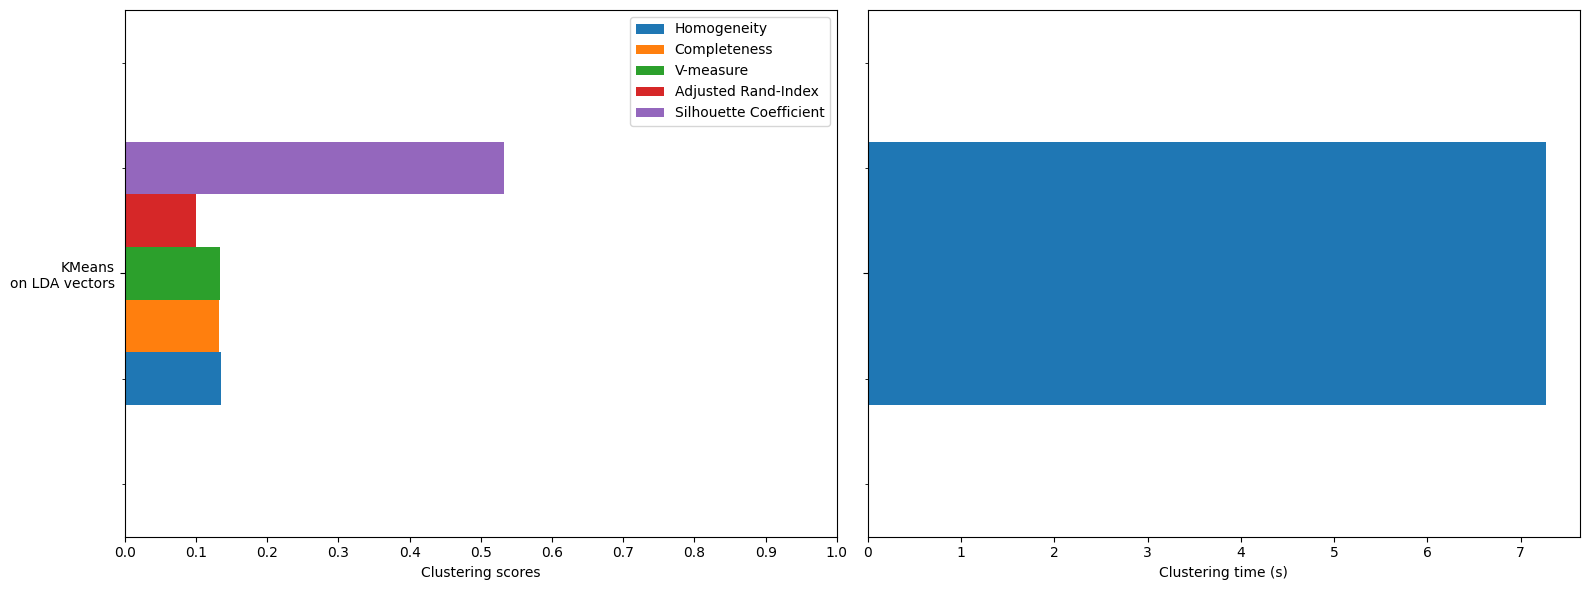

In [ ]:
#Call the `fit_and_evaluate` function to assess the performance of the KMeans algorithm
fit_and_evaluate(kmeans_three, embeddings_three, name="KMeans\non LDA vectors")

#Create subplots with two columns, shared y-axis, and specific figure size
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

#Create DataFrames from the evaluations and their standard deviations
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")
df = pd.DataFrame(evaluations[::-1]).set_index("estimator")

#Plot clustering scores in the first subplot
df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")
ax0.set_xlim(0, 1)  # Set x-axis limits from 0 to 1
ax0.set_xticks(np.arange(0, 1.1, 0.1))

#Plot clustering time in the second subplot
df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")

#Adjust layout for better spacing
plt.tight_layout()


Now we visualize the comparison between number of documents in each cluster and actual documents in the categories

<Figure size 1200x800 with 0 Axes>

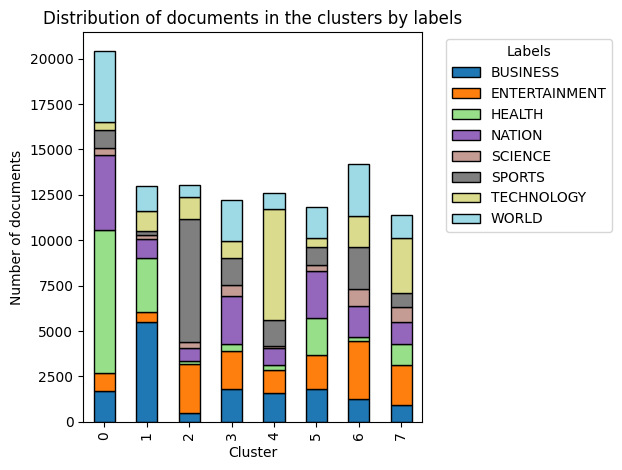

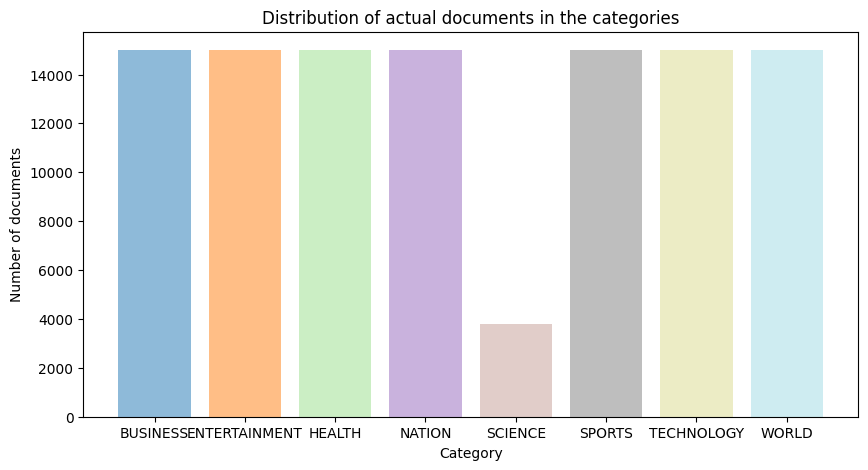


Distribution of documents in the clusters according to labels:
true_label  BUSINESS  ENTERTAINMENT  HEALTH  NATION  SCIENCE  SPORTS  \
cluster                                                                
0               1681           1010    7882    4103      408    1012   
1               5477            590    2948    1056      210     239   
2                461           2722     150     726      362    6755   
3               1783           2139     376    2615      611    1496   
4               1572           1281     282     927      111    1456   
5               1818           1875    2031    2569      370     962   
6               1274           3173     207    1753      907    2302   
7                934           2210    1124    1251      795     778   

true_label  TECHNOLOGY  WORLD  
cluster                        
0                  417   3917  
1                 1078   1399  
2                 1205    655  
3                  922   2300  
4                 6076 

In [ ]:
x_labels = news_three_df['Category']

#DataFrame with cluster labels and true labels
name_df = pd.DataFrame({'cluster': cluster_labels, 'true_label': x_labels})

#Cross-tabulation of clusters and true labels
x_cluster_label_counts = pd.crosstab(name_df['cluster'], name_df['true_label'])


#True labels
label_encoder = LabelEncoder()
y_labels = label_encoder.fit_transform(news_three_df['Category'])
category_names = label_encoder.classes_

#Format category names for the X-axis label
formatted_category_names = [name.replace(' ', '\n') for name in category_names]

#Calculate the number of documents in each category
category_sizes_three = np.bincount(y_labels)

#Create a DataFrame with cluster labels and true labels
df = pd.DataFrame({'cluster': cluster_labels, 'true_label': y_labels})

#Create a cross-tabulation of clusters and true labels
cluster_label_counts = pd.crosstab(df['cluster'], df['true_label'])

#Define the colors to be used in both plots
colors = plt.cm.tab20(np.linspace(0, 1, len(np.unique(y_labels))))

#Plotting
plt.figure(figsize=(12, 8))
cluster_label_counts.plot(kind='bar', stacked=True, colormap='tab20', edgecolor='black')
plt.title('Distribution of documents in the clusters by labels')
plt.xlabel('Cluster')
plt.ylabel('Number of documents')
plt.legend(title='Labels', labels = category_names, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Plot the distribution of actual documents in the categories using the same colors
plt.figure(figsize=(10, 5))
plt.bar(range(len(category_sizes_three)), category_sizes_three, color=colors, alpha=0.5, label='Actual documents')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.title('Distribution of actual documents in the categories')
plt.xticks(range(len(category_sizes_three)), formatted_category_names)
plt.show()

#Output the numbers
print("\nDistribution of documents in the clusters according to labels:")
print(x_cluster_label_counts)

#Output of numbers
print("\nNumber of documents in each cluster:")
for cluster_id, cluster_size in enumerate(cluster_sizes_lda):
    print(f"Cluster {cluster_id}: {cluster_size}")

print("\nDistribution of actual documents in the categories:")
for category_id, category_size in enumerate(category_sizes_three):
    print(f"Category {category_id}: {category_size}")

Get the average cosine similarity for each category

In [ ]:
#True labels
categories = news_three_df['Category'].unique()
#Calculation of the average cosine similarity for each category.
avg_cos_sim_per_category = {}
for category in categories:
    #Extracting the indices of documents in the current category.
    indices = news_three_df[news_three_df['Category'] == category].index
    if len(indices) > 1:
        #Extracting the LDA vectors of the documents in the current category.
        category_lda = embeddings_three[indices]
        #Calculate the cosine similarity matrix for these documents.
        category_sim_matrix = cosine_similarity(category_lda)
        #Calculate the average cosine similarity (excluding diagonal values).
        sum_similarities = np.sum(category_sim_matrix) - len(indices)  #Sum of all values excluding diagonal elements.
        count_pairs = len(indices) * (len(indices) - 1)  #Number of pairs excluding diagonal elements.
        avg_cos_sim = sum_similarities / count_pairs
        avg_cos_sim_per_category[category] = avg_cos_sim
    else:
        avg_cos_sim_per_category[category] = 1.0  #If there is only one document, the similarity is 1.

#Output the average cosine similarity for each category.
for category, avg_cos_sim in avg_cos_sim_per_category.items():
    print(f"Average Cosine Similarity for {category}: {avg_cos_sim}")

Average Cosine Similarity for SCIENCE: 0.2627153697954153
Average Cosine Similarity for TECHNOLOGY: 0.34987225112298254
Average Cosine Similarity for HEALTH: 0.4395304159863518
Average Cosine Similarity for WORLD: 0.2723019076310595
Average Cosine Similarity for ENTERTAINMENT: 0.25880897595266217
Average Cosine Similarity for SPORTS: 0.3597857058704596
Average Cosine Similarity for BUSINESS: 0.31212590742694657
Average Cosine Similarity for NATION: 0.28405453107172357


Get the cosine siimilarity between categories

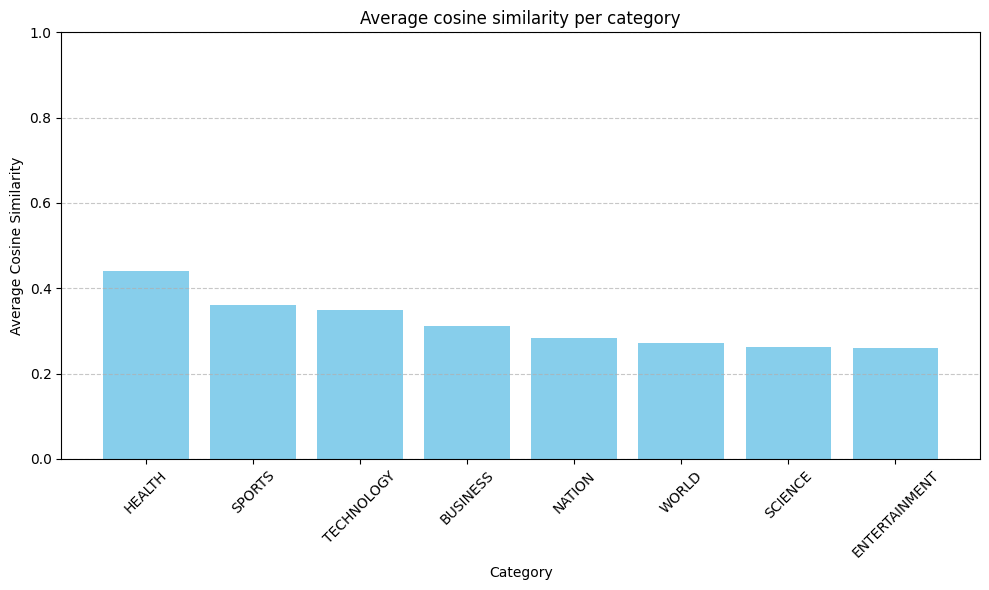

In [ ]:
# Sort the categories by average cosine similarity
sorted_categories = sorted(avg_cos_sim_per_category.keys(), key=lambda x: avg_cos_sim_per_category[x], reverse=True)
sorted_avg_cos_sim = [avg_cos_sim_per_category[cat] for cat in sorted_categories]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sorted_categories, sorted_avg_cos_sim, color='skyblue')
plt.xlabel('Category')
plt.ylabel('Average Cosine Similarity')
plt.title('Average cosine similarity per category')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Limit y-axis scale to 0 to 1 (since Cosine Similarity is between 0 and 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show chart
plt.show()

In [ ]:
# Get the unique categories
categories = news_three_df['Category'].unique()

# list for the results
results = []

# Pairs of consecutive categories
for i in range(0, len(categories) - 1, 2):  # Step size 2 to form pairs of two consecutive categories
    category1 = categories[i]
    category2 = categories[i + 1]

    # Extract the vectors of the documents in the first category
    indices1 = news_three_df[news_three_df['Category'] == category1].index
    category1_vector = embeddings_three[indices1]

    # Extract the documents in the second category
    indices2 = news_three_df[news_three_df['Category'] == category2].index
    category2_vector = embeddings_three[indices2]

    # Calculate the cosine similarity matrix between the documents of the two categories
    similarity_matrix = cosine_similarity(category1_vector, category2_vector)

    # Calculate the average cosine similarity value between the two categories
    avg_cos_sim_between_categories = np.mean(similarity_matrix)

    # Save the result
    results.append((category1, category2, avg_cos_sim_between_categories))

# Output the average cosine similarity for each pair of consecutive categories
for category1, category2, avg_cos_sim in results:
    print(f"Average Cosine Similarity between {category1} and {category2}: {avg_cos_sim}")

# If the number of categories is odd, the last category will not be processed
if len(categories) % 2 != 0:
    print(f"Warning: The number of categories is odd, the last category '{categories[-1]}' has no pair.")


Average Cosine Similarity between SCIENCE and TECHNOLOGY: 0.2110663356707185
Average Cosine Similarity between HEALTH and WORLD: 0.2892484211148729
Average Cosine Similarity between ENTERTAINMENT and SPORTS: 0.26483971676703427
Average Cosine Similarity between BUSINESS and NATION: 0.23179114517414526


Now we want to show the top ten documents for each cluster based on the cosine similarity.

In [ ]:
#Number of top documents you want to display
num_top_documents = 10
#Get the assignment of the documents to the clusters
#cluster_labels = kmeans.labels_

#Empty list to store the most important documents for each cluster
top_documents_per_cluster = []

#Iterate over each cluster
for cluster_id in range(true_k_three):

    #Filter the indexes of documents associated with this cluster
    cluster_indices = np.where(cluster_labels == cluster_id)[0]

    #Calculate the cosine similarity between the cluster center and all documents
    cluster_center = kmeans_three.cluster_centers_[cluster_id].reshape(1, -1)
    similarities = cosine_similarity(cluster_center, embeddings_three)[0]

    #Sort the documents according to their similarity and get the indices
    sorted_document_indices = cluster_indices[np.argsort(similarities[cluster_indices])[::-1]]

    #Select the first num_top_documents documents
    top_document_indices = sorted_document_indices[:num_top_documents]

    #Store the indexes of the top documents for this cluster
    top_documents_per_cluster.append(top_document_indices)

Here we create a heatmap which visually represents the top categories for each cluster based on the cosine similarity. The documents are sorted in descending order according to their similarity to the cluster center.

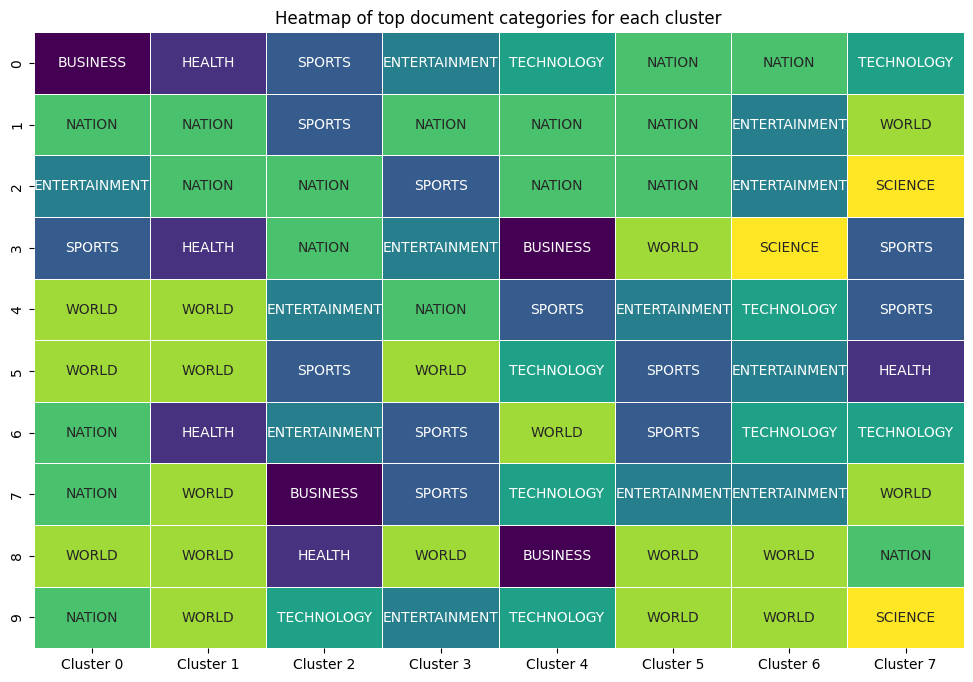

In [ ]:
#Create a heatmap of the top document categories for each cluster
heatmap_data = []
for cluster_id, top_document_indices in enumerate(top_documents_per_cluster):
    top_categories = news_three_df.iloc[top_document_indices]['Category'].values
    formatted_categories = ['\n'.join(category.split()) for category in top_categories]
    heatmap_data.append(formatted_categories)

#Create DataFrame for the heatmap
heatmap_df = pd.DataFrame(heatmap_data, index=[f'Cluster {i}' for i in range(true_k_three)])
heatmap_df = heatmap_df.T  # Transpose for better visualization
heatmap_df = heatmap_df.dropna()

#Convert categories to numerical values for heatmap coloring
category_to_num = {category: num for num, category in enumerate(heatmap_df.stack().unique())}
heatmap_numeric = heatmap_df.applymap(lambda x: category_to_num[x])

#Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_numeric,
    annot=heatmap_df,
    fmt='',
    cmap='viridis',
    cbar=False,
    linewidths=.5
)
plt.title("Heatmap of top document categories for each cluster")
plt.show()


# **Sources**

The datasets,code, different methods and explanations are from these sources:

* https://www.kaggle.com/datasets/rafsunahmad/classify-news-into-category
* https://www.kaggle.com/datasets/setseries/news-category-dataset
* https://www.kaggle.com/datasets/kotartemiy/topic-labeled-news-dataset
* https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
*https://www.learndatasci.com/glossary/cosine-similarity/
* https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
* ChatGPT to generate code and text
* D. Blei, A. Ng, and M. Jordan, “Latent dirichlet allocation,” vol. 3, pp. 601–608,
01 2001.
